### packages

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import funcs as f

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

In [2]:
fs=14
plt.rc("font",size=fs)

### parameters

In [3]:
outpath       = "/Volumes/Baby-Orange/XPIA-NCAR/processed/"
datapath      = "/Volumes/Baby-Orange/XPIA-NCAR/rawest/"
z_zi_target   = 0.5

### io

In [4]:
convective      = pd.read_csv(os.path.join(outpath,"datetimes_ziL_gt_25.csv"),header=None,index_col=[0])
convective_list = np.array([ pd.Timestamp(l[0]) for l in convective.values.tolist() ])
nt              = len(convective_list)
print(nt)

269


In [5]:
df_zi       = pd.read_csv("/Volumes/Baby-Orange/XPIA-NCAR/processed/ziL_all_days.csv", header=None, index_col=[0], parse_dates=True)

In [6]:
year    = 2015
month   = 3
day     = 20
hour    = 22
minute  = 0

datetime = pd.Timestamp(year=year,month=month,day=day,hour=hour,minute=minute)

In [7]:
varname = 'w'

In [19]:
zi = df_zi.loc[datetime].values[0]
xy_primes, xy_means = f.get_prime_and_means(datapath, datetime, zi, varname=varname, z_zi_target=z_zi_target, verbose=True)            

................
Simulation : LES
File : WRF_LES_25m_3D_2015-03-20_22:00_plus_filtered.nc
Vertical level : 8
Getting w_filt
Getting w
................
Simulation : vles
File : WRF_vles_3D_2015-03-20_22:00_plus_filtered.nc
Vertical level : 8
Getting w_filt
................
Simulation : mynn
File : WRF_mynn_3D_2015-03-20_22:00_plus_filtered.nc
Vertical level : 8
Getting w_filt
................
Simulation : ysu
File : WRF_ysu_3D_2015-03-20_22:00_plus_filtered.nc
Vertical level : 8
Getting w_filt
................
Simulation : sh
File : WRF_sh_3D_2015-03-20_22:00_plus_filtered.nc
Vertical level : 8
Getting w_filt


### first figure

In [11]:
coords = {}
for key in xy_primes.keys():
    npts,npts = xy_primes[key].shape
    delta = 333.0 if npts<500 else 25.0
    coords[key] = np.arange(delta/2.,30000,delta)

In [13]:
xy_means

{'LES': -0.00557154753499305,
 'LES_raw': -0.006353957604801791,
 'vles': -0.011625841550278921,
 'mynn': -0.008113724733776813,
 'ysu': -0.008926147426313659,
 'sh': -0.0053579018470149104}

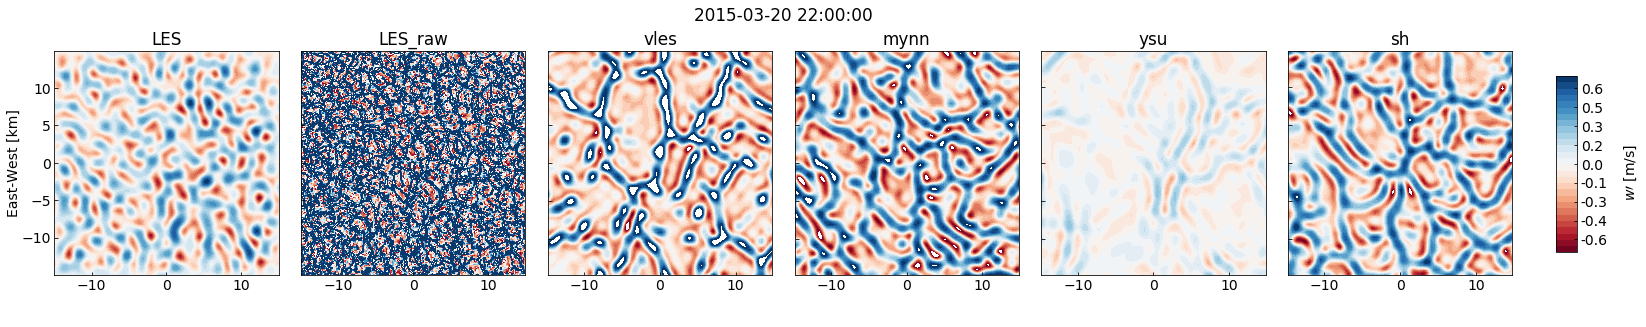

In [12]:
keys_in_order = ["LES_raw","LES","vles","mynn","ysu","sh"]

fig = plt.figure(figsize=(6*5,5))

axbig = fig.add_subplot(111)
axbig.spines['top'].set_color('none')
axbig.spines['bottom'].set_color('none')
axbig.spines['left'].set_color('none')
axbig.spines['right'].set_color('none')
axbig.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)#     axbig.set_xlabel("$y_{rotor} - \Delta y_{wake}$",labelpad=-5)
axbig.set_ylabel("South-North [km]")
axbig.set_ylabel("East-West [km]")
axbig.set_title(datetime)

axs = {}

for iax,sim in enumerate(xy_primes.keys()):
    axs[iax] = fig.add_subplot(1,6,iax+1,aspect="equal")
    
    x = (coords[sim]/1000)-np.mean(coords[sim]/1000)
    p = axs[iax].contourf(x, x, xy_primes[sim], levels=np.arange(-0.7,0.71,0.05), cmap='RdBu')
    axs[iax].set_title(sim)
    #plt.colorbar(p)
    
    if iax>0:
        plt.setp(axs[iax].get_yticklabels(), visible=False)
        
    axs[iax].xaxis.set_tick_params(direction='in')
    axs[iax].yaxis.set_tick_params(direction='in')           
        
fig.subplots_adjust(right=0.8, wspace=0.1)
cbar_ax = fig.add_axes([0.82, 0.255, 0.01, 0.49])
clb = fig.colorbar(p, cax=cbar_ax, format=FormatStrFormatter('%3.1f'))
clb.set_label('$w\prime$ [m/s]', labelpad=15, y=0.45)
clb.ax.tick_params(direction='in')     

In [14]:
import xarray

In [94]:
ysu=xarray.open_dataset("/Users/pdoubraw/Desktop/YSU/wrfout_d03_2015-03-20_22:00:00")
sh =xarray.open_dataset("/Users/pdoubraw/Desktop/SH/wrfout_d03_2015-03-20_22:00:00")

In [95]:
ttt=(ysu["W"].squeeze().isel(bottom_top_stag=7)+ysu["W"].squeeze().isel(bottom_top_stag=8))/2
uuu=(sh["W"].squeeze().isel(bottom_top_stag=7)+sh["W"].squeeze().isel(bottom_top_stag=8))/2

In [96]:
ttt_subset=ttt.values[154:154+90,154:154+90]
uuu_subset=uuu.values[154:154+90,154:154+90]

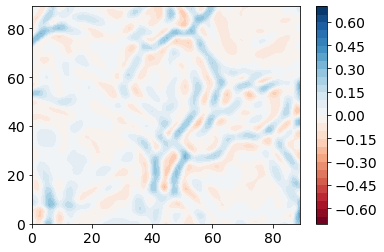

In [97]:
plt.contourf(ttt_subset-np.median(ttt_subset),levels=np.arange(-0.7,0.71,0.05),cmap='RdBu',);plt.colorbar()

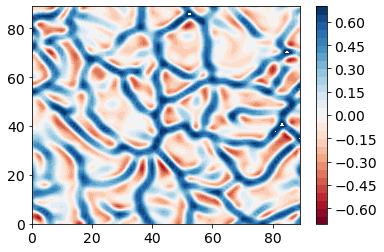

In [98]:
plt.contourf(uuu_subset-np.median(uuu_subset),levels=np.arange(-0.7,0.71,0.05),cmap='RdBu',);plt.colorbar()

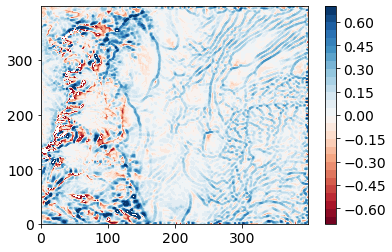

In [93]:
plt.contourf(ttt-np.median(ttt),levels=np.arange(-0.7,0.71,0.05),cmap='RdBu',);plt.colorbar()

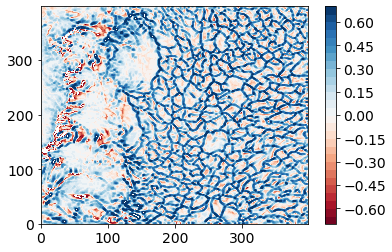

In [99]:
plt.contourf(uuu-np.median(uuu),levels=np.arange(-0.7,0.71,0.05),cmap='RdBu',);plt.colorbar()

In [83]:
ttt

<xarray.DataArray 'W' (south_north: 399, west_east: 399)>
array([[-0.138321, -0.1061  , -0.06407 , ..., -0.073482, -0.159493, -0.117463],
       [-0.163158, -0.143767, -0.14093 , ...,  0.130088,  0.010553,  0.044335],
       [-0.165493, -0.126795, -0.137601, ...,  0.270915,  0.196923,  0.205176],
       ...,
       [ 0.002518, -0.042411, -0.140496, ..., -0.071761, -0.039857,  0.119625],
       [ 0.054388,  0.018243, -0.095958, ..., -0.089787, -0.079204,  0.019309],
       [ 0.112166,  0.063211,  0.000895, ..., -0.22394 , -0.210162, -0.141634]],
      dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 39.37211 39.372402 ... 40.704433
    XLONG    (south_north, west_east) float32 -105.70853 -105.70456 ... -104.248
    XTIME    datetime64[ns] 2015-03-20T22:00:00
Dimensions without coordinates: south_north, west_east

In [72]:
xr=xarray.open_dataset("/Volumes/Baby-Orange/XPIA-NCAR/rawest/WRF_ysu_3D_2015-03-20_22:00_plus_filtered.nc")
w = xr['w'].isel(bottom_top=8)
# xr['ws_filt'] = xr

In [73]:
xr2=xarray.open_dataset("/Volumes/Baby-Orange/XPIA-NCAR/rawest/WRF_sh_3D_2015-03-20_22:00_plus_filtered.nc")
w2 = xr2['w'].isel(bottom_top=8)

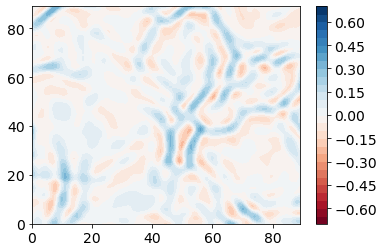

In [74]:
plt.contourf(w-w.median(),levels=np.arange(-0.7,0.71,0.05),cmap='RdBu',);plt.colorbar()

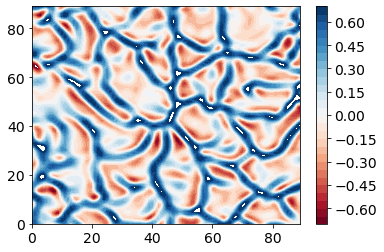

In [75]:
plt.contourf(w2-w2.median(),levels=np.arange(-0.7,0.71,0.05),cmap='RdBu',);plt.colorbar()

### next figs

In [42]:
def animate(i):
    
    datetime = datetimes[i]
    zi           = df_zi.loc[datetime].values[0]
    xy_primes, xy_means = f.get_prime_and_means(datapath, datetime, zi, varname=varname, z_zi_target=z_zi_target)    
    
    for iax,sim in enumerate(xy_primes.keys()):    
        axs[iax].collections = []
        x = (coords[sim]/1000)-np.mean(coords[sim]/1000)        
        p   = axs[iax].contourf(x, x, xy_primes[sim], levels=np.arange(-0.6,0.61,0.05), cmap='RdBu')

    axbig.set_title(datetime)        


# anim = FuncAnimation(fig, animate, interval=200, frames=range(10))
# anim.save(…)


In [43]:
anim = FuncAnimation(fig, animate, interval=200, frames=range(3))

In [44]:
anim